# BatchNormalization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from common.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

## BatchNormalizationレイヤの実装

In [4]:
class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # Conv層の場合は4次元、全結合層の場合は2次元  

        # テスト時に使用する平均と分散
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx


============== 1/16 ==============
epoch:0 | 0.093 - 0.089
epoch:1 | 0.097 - 0.089
epoch:2 | 0.097 - 0.108
epoch:3 | 0.097 - 0.137
epoch:4 | 0.097 - 0.166
epoch:5 | 0.097 - 0.2
epoch:6 | 0.097 - 0.23
epoch:7 | 0.097 - 0.25
epoch:8 | 0.097 - 0.28
epoch:9 | 0.097 - 0.295
epoch:10 | 0.097 - 0.324
epoch:11 | 0.097 - 0.337
epoch:12 | 0.097 - 0.345
epoch:13 | 0.097 - 0.371
epoch:14 | 0.097 - 0.386
epoch:15 | 0.097 - 0.39
epoch:16 | 0.097 - 0.408
epoch:17 | 0.097 - 0.41


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.097 - 0.427
epoch:19 | 0.097 - 0.441
============== 2/16 ==============
epoch:0 | 0.097 - 0.091
epoch:1 | 0.117 - 0.084
epoch:2 | 0.117 - 0.13
epoch:3 | 0.117 - 0.183
epoch:4 | 0.117 - 0.219
epoch:5 | 0.117 - 0.241
epoch:6 | 0.117 - 0.271
epoch:7 | 0.117 - 0.301
epoch:8 | 0.117 - 0.313
epoch:9 | 0.117 - 0.336
epoch:10 | 0.117 - 0.351
epoch:11 | 0.117 - 0.388
epoch:12 | 0.117 - 0.401
epoch:13 | 0.117 - 0.417
epoch:14 | 0.117 - 0.446
epoch:15 | 0.117 - 0.464
epoch:16 | 0.117 - 0.466
epoch:17 | 0.117 - 0.496
epoch:18 | 0.117 - 0.502


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.515
============== 3/16 ==============
epoch:0 | 0.087 - 0.083
epoch:1 | 0.329 - 0.105
epoch:2 | 0.476 - 0.132
epoch:3 | 0.555 - 0.173
epoch:4 | 0.615 - 0.228
epoch:5 | 0.702 - 0.268
epoch:6 | 0.774 - 0.312
epoch:7 | 0.819 - 0.346
epoch:8 | 0.834 - 0.373
epoch:9 | 0.849 - 0.409
epoch:10 | 0.875 - 0.446
epoch:11 | 0.892 - 0.486
epoch:12 | 0.922 - 0.508
epoch:13 | 0.924 - 0.53
epoch:14 | 0.941 - 0.554
epoch:15 | 0.947 - 0.577
epoch:16 | 0.956 - 0.604
epoch:17 | 0.957 - 0.624


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.961 - 0.634
epoch:19 | 0.968 - 0.658
============== 4/16 ==============
epoch:0 | 0.106 - 0.102
epoch:1 | 0.248 - 0.11
epoch:2 | 0.411 - 0.186
epoch:3 | 0.492 - 0.264
epoch:4 | 0.572 - 0.336
epoch:5 | 0.622 - 0.375
epoch:6 | 0.675 - 0.431
epoch:7 | 0.696 - 0.474
epoch:8 | 0.731 - 0.512
epoch:9 | 0.747 - 0.549
epoch:10 | 0.785 - 0.581
epoch:11 | 0.794 - 0.602
epoch:12 | 0.81 - 0.626
epoch:13 | 0.817 - 0.655
epoch:14 | 0.836 - 0.678
epoch:15 | 0.841 - 0.694
epoch:16 | 0.869 - 0.712
epoch:17 | 0.866 - 0.726
epoch:18 | 0.873 - 0.746


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.873 - 0.763
============== 5/16 ==============
epoch:0 | 0.133 - 0.105
epoch:1 | 0.14 - 0.17
epoch:2 | 0.146 - 0.313
epoch:3 | 0.152 - 0.422
epoch:4 | 0.159 - 0.528
epoch:5 | 0.183 - 0.598
epoch:6 | 0.196 - 0.643
epoch:7 | 0.199 - 0.691
epoch:8 | 0.2 - 0.728
epoch:9 | 0.21 - 0.757
epoch:10 | 0.232 - 0.787
epoch:11 | 0.251 - 0.802
epoch:12 | 0.28 - 0.815
epoch:13 | 0.296 - 0.838
epoch:14 | 0.301 - 0.851
epoch:15 | 0.305 - 0.856
epoch:16 | 0.307 - 0.873
epoch:17 | 0.323 - 0.876


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.328 - 0.881
epoch:19 | 0.351 - 0.888
============== 6/16 ==============
epoch:0 | 0.064 - 0.089
epoch:1 | 0.133 - 0.197
epoch:2 | 0.119 - 0.465
epoch:3 | 0.118 - 0.607
epoch:4 | 0.118 - 0.665
epoch:5 | 0.137 - 0.724
epoch:6 | 0.138 - 0.758
epoch:7 | 0.116 - 0.783
epoch:8 | 0.116 - 0.805
epoch:9 | 0.117 - 0.831
epoch:10 | 0.117 - 0.851
epoch:11 | 0.164 - 0.857
epoch:12 | 0.116 - 0.874
epoch:13 | 0.116 - 0.885
epoch:14 | 0.116 - 0.897
epoch:15 | 0.116 - 0.911
epoch:16 | 0.123 - 0.92
epoch:17 | 0.184 - 0.925


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.136 - 0.933
epoch:19 | 0.185 - 0.939
============== 7/16 ==============
epoch:0 | 0.117 - 0.1
epoch:1 | 0.117 - 0.236
epoch:2 | 0.117 - 0.566
epoch:3 | 0.117 - 0.697
epoch:4 | 0.117 - 0.762
epoch:5 | 0.117 - 0.784
epoch:6 | 0.117 - 0.807
epoch:7 | 0.117 - 0.846
epoch:8 | 0.117 - 0.868
epoch:9 | 0.116 - 0.896
epoch:10 | 0.116 - 0.918
epoch:11 | 0.116 - 0.933
epoch:12 | 0.116 - 0.956
epoch:13 | 0.116 - 0.966
epoch:14 | 0.116 - 0.966
epoch:15 | 0.117 - 0.975
epoch:16 | 0.117 - 0.983
epoch:17 | 0.117 - 0.986
epoch:18 | 0.117 - 0.99


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.99
============== 8/16 ==============
epoch:0 | 0.097 - 0.086
epoch:1 | 0.117 - 0.342
epoch:2 | 0.117 - 0.663
epoch:3 | 0.105 - 0.777
epoch:4 | 0.117 - 0.834
epoch:5 | 0.117 - 0.875
epoch:6 | 0.117 - 0.918
epoch:7 | 0.117 - 0.944
epoch:8 | 0.117 - 0.967
epoch:9 | 0.117 - 0.973
epoch:10 | 0.117 - 0.983
epoch:11 | 0.117 - 0.989
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.993
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.996
epoch:17 | 0.117 - 0.997
epoch:18 | 0.116 - 0.997
epoch:19 | 0.117 - 0.997


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 9/16 ==============
epoch:0 | 0.1 - 0.161
epoch:1 | 0.117 - 0.608
epoch:2 | 0.116 - 0.746
epoch:3 | 0.116 - 0.81
epoch:4 | 0.117 - 0.845
epoch:5 | 0.117 - 0.87
epoch:6 | 0.117 - 0.893
epoch:7 | 0.117 - 0.892
epoch:8 | 0.117 - 0.914
epoch:9 | 0.117 - 0.948
epoch:10 | 0.117 - 0.989
epoch:11 | 0.117 - 0.992
epoch:12 | 0.117 - 0.999
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.093 - 0.106
epoch:1 | 0.1 - 0.557
epoch:2 | 0.117 - 0.83
epoch:3 | 0.116 - 0.835
epoch:4 | 0.116 - 0.874
epoch:5 | 0.116 - 0.897
epoch:6 | 0.116 - 0.949
epoch:7 | 0.116 - 0.967
epoch:8 | 0.116 - 0.987
epoch:9 | 0.116 - 0.993
epoch:10 | 0.116 - 0.994
epoch:11 | 0.116 - 0.995
epoch:12 | 0.116 - 0.997
epoch:13 | 0.116 - 0.997
epoch:14 | 0.116 - 0.997
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.997


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.116 - 0.997
epoch:19 | 0.116 - 0.943
============== 11/16 ==============
epoch:0 | 0.116 - 0.185
epoch:1 | 0.116 - 0.515
epoch:2 | 0.116 - 0.537
epoch:3 | 0.116 - 0.708
epoch:4 | 0.116 - 0.763
epoch:5 | 0.116 - 0.713
epoch:6 | 0.116 - 0.782
epoch:7 | 0.116 - 0.775
epoch:8 | 0.117 - 0.806
epoch:9 | 0.117 - 0.879
epoch:10 | 0.117 - 0.883
epoch:11 | 0.117 - 0.884
epoch:12 | 0.116 - 0.887
epoch:13 | 0.116 - 0.884
epoch:14 | 0.116 - 0.89
epoch:15 | 0.116 - 0.871
epoch:16 | 0.116 - 0.878
epoch:17 | 0.116 - 0.893
epoch:18 | 0.116 - 0.899


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.901
============== 12/16 ==============
epoch:0 | 0.117 - 0.151
epoch:1 | 0.117 - 0.573
epoch:2 | 0.117 - 0.611
epoch:3 | 0.116 - 0.602
epoch:4 | 0.116 - 0.632
epoch:5 | 0.116 - 0.69
epoch:6 | 0.116 - 0.69
epoch:7 | 0.116 - 0.701
epoch:8 | 0.116 - 0.796
epoch:9 | 0.116 - 0.8
epoch:10 | 0.116 - 0.772
epoch:11 | 0.116 - 0.76
epoch:12 | 0.116 - 0.806
epoch:13 | 0.116 - 0.804
epoch:14 | 0.116 - 0.791
epoch:15 | 0.116 - 0.792
epoch:16 | 0.116 - 0.787
epoch:17 | 0.116 - 0.803


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.116 - 0.807
epoch:19 | 0.116 - 0.81
============== 13/16 ==============
epoch:0 | 0.116 - 0.157
epoch:1 | 0.117 - 0.411
epoch:2 | 0.117 - 0.54
epoch:3 | 0.117 - 0.576
epoch:4 | 0.117 - 0.56
epoch:5 | 0.117 - 0.661
epoch:6 | 0.117 - 0.658
epoch:7 | 0.117 - 0.672
epoch:8 | 0.117 - 0.665
epoch:9 | 0.117 - 0.664
epoch:10 | 0.117 - 0.688
epoch:11 | 0.117 - 0.718
epoch:12 | 0.117 - 0.694
epoch:13 | 0.117 - 0.697
epoch:14 | 0.117 - 0.704
epoch:15 | 0.117 - 0.718
epoch:16 | 0.117 - 0.68
epoch:17 | 0.117 - 0.72


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.675
epoch:19 | 0.117 - 0.737
============== 14/16 ==============
epoch:0 | 0.117 - 0.12
epoch:1 | 0.117 - 0.425
epoch:2 | 0.117 - 0.477
epoch:3 | 0.117 - 0.507
epoch:4 | 0.117 - 0.489
epoch:5 | 0.117 - 0.52
epoch:6 | 0.117 - 0.507
epoch:7 | 0.117 - 0.522
epoch:8 | 0.117 - 0.52
epoch:9 | 0.117 - 0.522
epoch:10 | 0.117 - 0.522
epoch:11 | 0.117 - 0.523
epoch:12 | 0.117 - 0.523
epoch:13 | 0.117 - 0.616
epoch:14 | 0.117 - 0.616
epoch:15 | 0.117 - 0.613
epoch:16 | 0.117 - 0.614
epoch:17 | 0.117 - 0.617
epoch:18 | 0.117 - 0.619


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.594
============== 15/16 ==============
epoch:0 | 0.099 - 0.097
epoch:1 | 0.117 - 0.244
epoch:2 | 0.117 - 0.4
epoch:3 | 0.117 - 0.412
epoch:4 | 0.117 - 0.414
epoch:5 | 0.117 - 0.425
epoch:6 | 0.117 - 0.387
epoch:7 | 0.117 - 0.485
epoch:8 | 0.117 - 0.5
epoch:9 | 0.117 - 0.502
epoch:10 | 0.117 - 0.501
epoch:11 | 0.117 - 0.518
epoch:12 | 0.117 - 0.493
epoch:13 | 0.117 - 0.515
epoch:14 | 0.117 - 0.52
epoch:15 | 0.117 - 0.513
epoch:16 | 0.117 - 0.526
epoch:17 | 0.117 - 0.531


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.528
epoch:19 | 0.117 - 0.532
============== 16/16 ==============
epoch:0 | 0.116 - 0.247
epoch:1 | 0.116 - 0.189
epoch:2 | 0.116 - 0.265
epoch:3 | 0.105 - 0.305
epoch:4 | 0.116 - 0.4
epoch:5 | 0.116 - 0.4
epoch:6 | 0.116 - 0.411
epoch:7 | 0.116 - 0.38
epoch:8 | 0.116 - 0.414
epoch:9 | 0.116 - 0.421
epoch:10 | 0.116 - 0.424
epoch:11 | 0.116 - 0.423
epoch:12 | 0.116 - 0.42
epoch:13 | 0.116 - 0.418
epoch:14 | 0.116 - 0.425
epoch:15 | 0.116 - 0.424
epoch:16 | 0.116 - 0.425
epoch:17 | 0.116 - 0.424
epoch:18 | 0.116 - 0.424
epoch:19 | 0.116 - 0.425


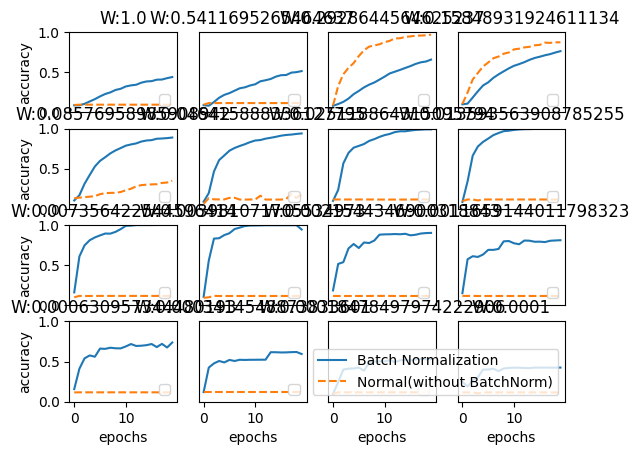

In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()